## Gillespie Algorithm

### The Gillespie Algorithm(or occasionally the Doob-Gillespie algorithm) generates a statistically correct trajectory(posssible solution) of a stochastic equation system for which the reaction rates are known. The algorithm was first presented by Doob in the mid 1940s. It was implented by Kendall in the 1950s. However it wasn't until the mid 1970s that Gillespie re-drived the method by studying physical systems that it became widely used. It is also sometime called as SSA method.
### For this let consider a gene as x and some mRNA is transcribed from x with production rate k and it will be degraded with rate $\gamma_{x}$. For this list, all the rate in array as {r = [k , $\gamma_{x}$]}. For this let choose a time point of the reaction. If we are at time t which could be zero or can be any time between algorithm. Then next time is going to be t + $\tau$ . Here we choose $\tau $ from exponential random distribution with the parameter lambda  which is the sum of all rates at time t. After choosing the time point it is important to know whether it will be production of mRNa or breakdown of mRNA . The rate for breakdown depends on the current level of x. If there will be x zero than $\gamma_{x}$ will be zero and there will be only production. But suppose if we have couple of x with some positive number . So to choose the event going to happen we take random draw between two of them and weight the probabilities accordingly. Here probability of production of mRNA that means probability of x going to x + 1{ P( x$\rightarrow$ x + 1) = ($\frac{k}{sum(r)}$)} and probability of breaking down of mRNA isthat means probability of x - 1 { P( x$\rightarrow$ x - 1) = ($\frac{\gamma_{x}}{sum(r)}$)}.

### The differential equation for this:
$$\frac{dx}{dt} = k - \gamma x $$

| Events                | Rates       |
| --------------------- | ----------- |
| x $\rightarrow$ x + 1 | k           |
| x $\rightarrow$ x - 1 | $\gamma x $ |

### Where
* k is the production rate for mRNA
* $\gamma_{x}$ is the degradation rate for mRNA

In [18]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern numerical calculations,
# solving the ordinary differential equations, and plotting them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# integrate a system of ordinary differential equations
# initial value problem
from scipy.integrate import odeint

# module to make available data structures and routines
# for numerics
import numpy as np
import random

In [19]:
x = [0] # x represent mRNA
t = [0] # t represnt time point 

In [20]:
tend = 1000 # simulation end time

In [21]:
k = 2 # production rate
gamma = 0.1 # degradation rate

In [22]:
while t[-1] < tend:
    current_x = x[-1] # gives latest value of x
    rates = [k, gamma * current_x]
    rate_sum = sum(rates)
    tau = np.random.exponential(scale=1/rate_sum) # tau is the time points for next event
    t.append(t[-1] + tau)
    rand = random.uniform(0,1)
    if rand * rate_sum > 0 and rand * rate_sum < rates[0]:# production event
            x.append(x[-1] + 1)
    elif rand * rate_sum > rates[0] and rand * rate_sum < rates[0] + rates[1]:# decay event
            x.append(x[-1] - 1)

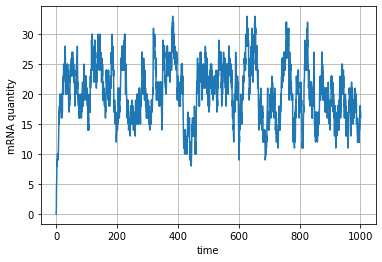

In [23]:
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("mRNA quantity")
plt.grid()
#plt.show()
plt.savefig("gillespie_algoritm_1.pdf", dpi=400,  bbox_inches='tight')

## Observation

### ### The above figures shows the relation between quantity of mRNA and protein over time.  Along the y-axis, we have the time axis and along x-axis we have abundance of both mRNA and protein. We observe that M(blue line) denotes quantity of  mRNA in the above fig. If we do the stimulation for hundred times or thousand times it will show average steady state near about 20 for above fig. Since it is stochastic model the steady state is not real because it is fluctuating near the steady state. 

## Changing the initial parameters

In [24]:
x = [0] # x represent mRNA
t = [0] # t represnt time point 

In [25]:
tend = 1000 # simulation end time

In [26]:
k = 3 # production rate
gamma = 0.4 # degradation rate

In [27]:
while t[-1] < tend:
    current_x = x[-1] # gives latest value of x
    rates = [k, gamma * current_x]
    rate_sum = sum(rates)
    tau = np.random.exponential(scale=1/rate_sum) # tau is the time points for next event
    t.append(t[-1] + tau)
    rand = random.uniform(0,1)
    if rand * rate_sum > 0 and rand * rate_sum < rates[0]:# production event
            x.append(x[-1] + 1)
    elif rand * rate_sum > rates[0] and rand * rate_sum < rates[0] + rates[1]:# decay event
            x.append(x[-1] - 1)

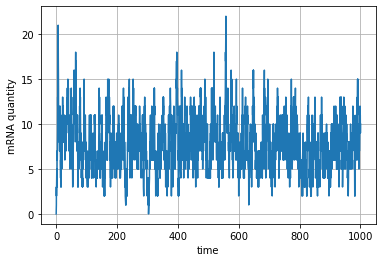

In [28]:
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("mRNA quantity")
plt.grid()
#plt.show()
plt.savefig("gillespie_algoritm_2.pdf", dpi=400,  bbox_inches='tight')

### If we change the initial parameters of k and $\gamma$ greater than above we came to know that flucuation is more and hard to find the steady state .